# Data Visualization using Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

This notebook covers some examples of plots in Seaborn

Lets import some libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.random.seed(sum(map(ord, "aesthetics")))
%matplotlib inline

## Seaborn figure styles and colour styles

Define a simple function to plot some sine waves with offset.

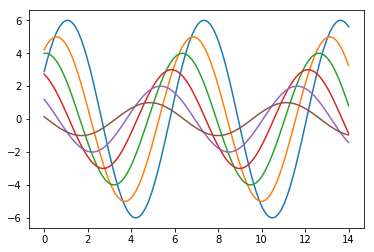

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

To switch to seaborn defaults, simply call the set() function.

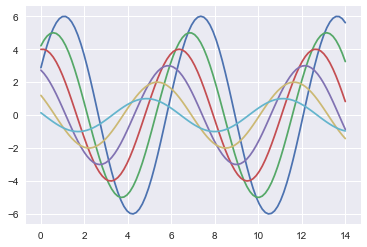

In [3]:
sns.set()
sinplot()

There are five preset seaborn themes: "darkgrid", "whitegrid", "dark", "white", and "ticks". They are each suited to different applications and personal preferences. The default theme is darkgrid. Lets try the whitegrid

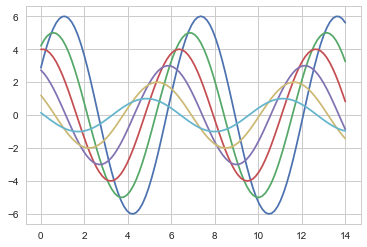

In [4]:
sns.set_style("whitegrid")
sinplot()

Both the white and ticks styles can benefit from removing the top and right axes spines, which are not needed. It’s impossible to do this through the matplotlib parameters, but you can call the seaborn function despine() to remove them:

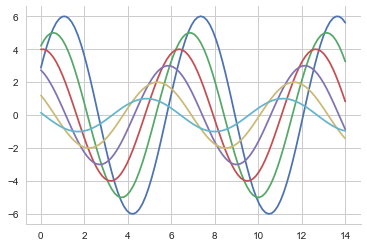

In [5]:
sinplot()
sns.despine()

We can also use the axes_style() function in a with statement to temporarily set plot parameters. This also allows us to make figures with differently-styled axes:

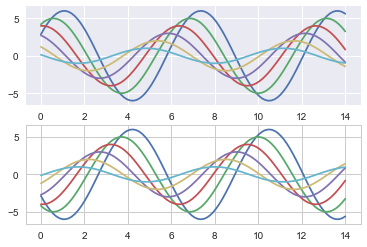

In [6]:
with sns.axes_style("darkgrid"):
    plt.subplot(2,1,1)
    sinplot()
plt.subplot(2,1,2)
sinplot(-1)

If we want to customize the seaborn styles, we can pass a dictionary of parameters to the rc argument of axes_style() and set_style(). For example.

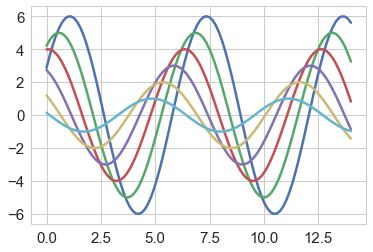

In [7]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

Linewidth and fonts on scale are updates as above.

To set and modify color palettes

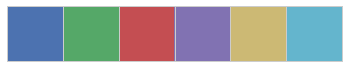

In [8]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

There are six variations of the default theme, called deep, muted, pastel, bright, dark, and colorblind. When you have more than six categories to distinguish, the easiest thing is to draw evenly-spaced colors in a circular color space. The most common way to do this uses the hls color space, which is a simple transformation of RGB values.

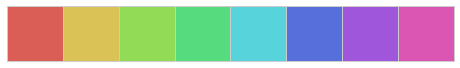

In [9]:
sns.palplot(sns.color_palette("hls", 8))

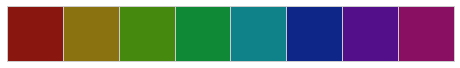

In [10]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

 The hls_palette() function that lets you control the lightness and saturation of the colors.

To modify the colour palette

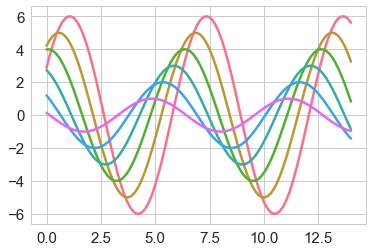

In [11]:
sns.set_palette("husl")
sinplot()

Switching to Seaborn defaults,

In [14]:
sns.set()

## Visualizing the statistical distribution of a dataset

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This section will give a brief description of some of the tools in seaborn for examining univariate and bivariate distributions.

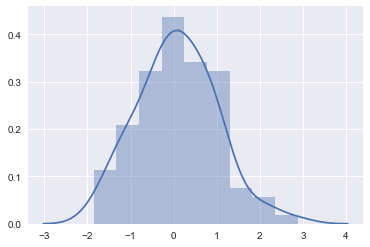

In [15]:
from scipy import stats, integrate
np.random.seed(sum(map(ord, "distributions")))

x = np.random.normal(size=100)
sns.distplot(x);

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot( ) function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

To point the observations, let’s remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the rugplot() function, but it is also available in distplot():

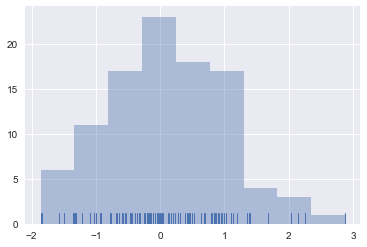

In [17]:
sns.distplot(x, kde=False, rug=True);

When drawing histograms, the main choice you have is the number of bins to use and where to place them, trying more or fewer bins might reveal other features in the data:

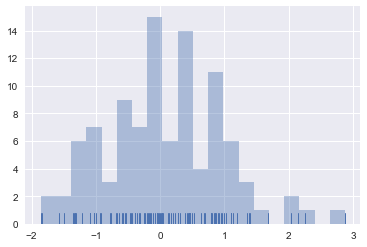

In [18]:
sns.distplot(x, bins=20, kde=False, rug=True)

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution

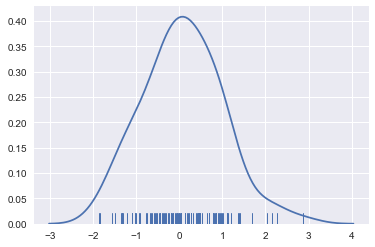

In [19]:
sns.distplot(x, hist=False, rug=True)

We can see that if we use the kdeplot() function in seaborn, we get the same curve. This function is used by distplot(), but it provides a more direct interface with easier access to other options when you just want the density estimate. The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

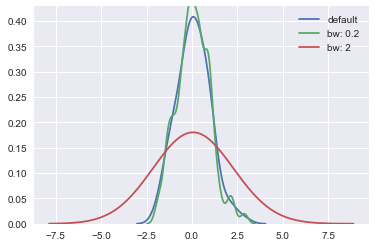

In [20]:
sns.kdeplot(x, label = "default")
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

We can also use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

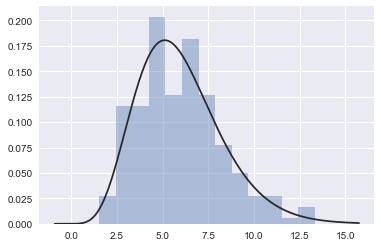

In [21]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes. Lets cook some data

In [23]:
import pandas as pd
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib ``plt.scatter()`` function, and it is also the default kind of plot shown by the ``jointplot()`` function:

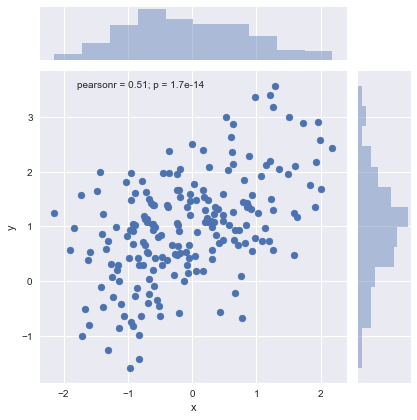

In [24]:
sns.jointplot(x="x", y="y", data=df)

The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s available through the matplotlib ``plt.hexbin`` function and as a style in ``jointplot()``. It looks best with a white background:

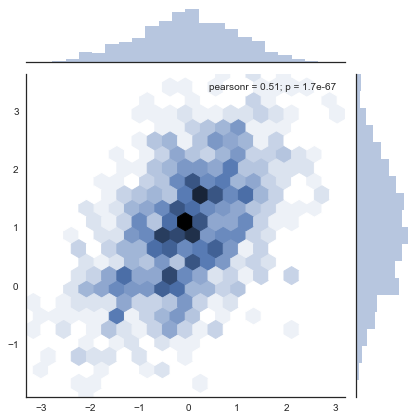

In [29]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex");

It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in ``jointplot()``

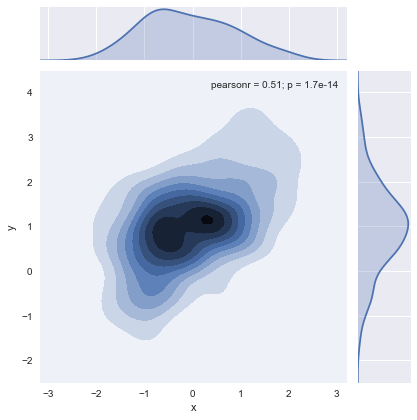

In [30]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

The ``jointplot()`` function uses a ``JointGrid`` to manage the figure. For more flexibility, we may want to draw our figure by using ``JointGrid`` directly. ``jointplot()`` returns the ``JointGrid`` object after plotting, which we can use to add more layers or to tweak other aspects of the visualization:

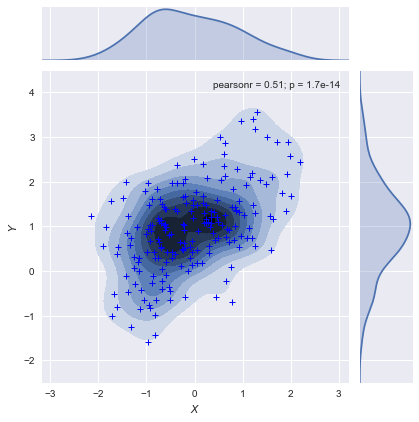

In [35]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde")
g.plot_joint(plt.scatter, c ='b',s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

To plot multiple pairwise bivariate distributions in a dataset, you can use the ``pairplot()`` function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. Colour is assigned based on the class vector ``species`` and palette chosen is "husl". By default, it also draws the univariate distribution of each variable on the diagonal Axes:

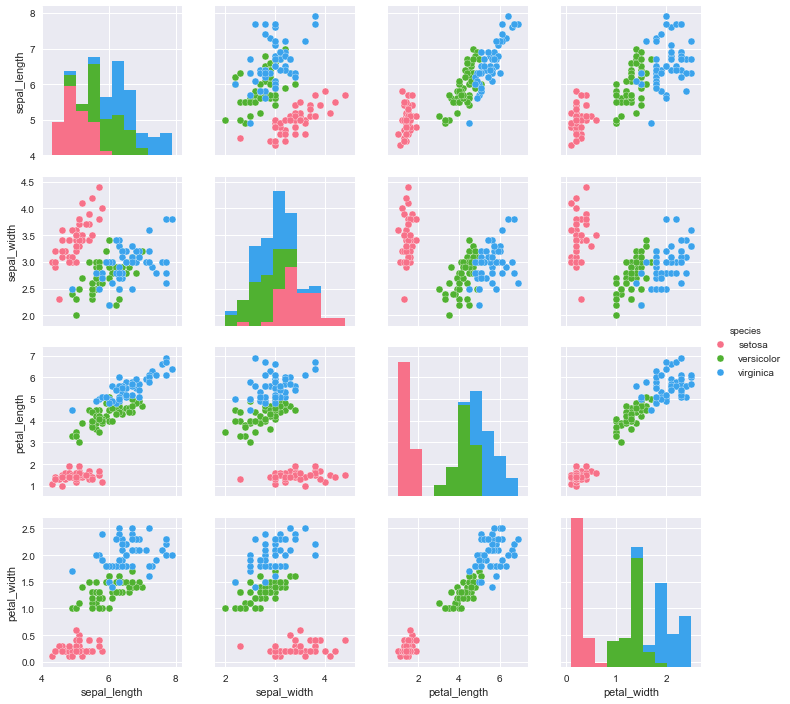

In [38]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species',palette="husl")

## Visualizing Linear relationships using Regression

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

In [40]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
tips = sns.load_dataset("tips")

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions are regplot() and lmplot(). In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

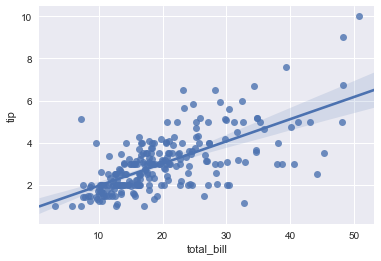

In [41]:
sns.regplot(x="total_bill", y="tip", data=tips)

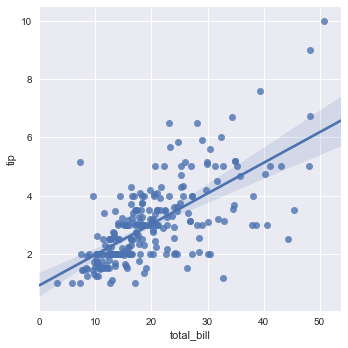

In [42]:
sns.lmplot(x="total_bill", y="tip", data=tips)

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. For example, in the first case, the linear regression is a good model:

In [43]:
anscombe = sns.load_dataset("anscombe")

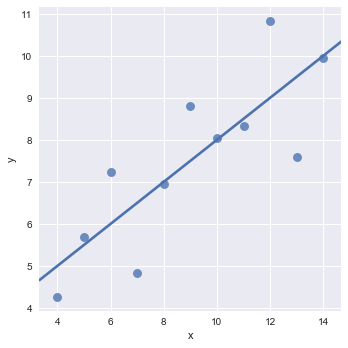

In [44]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})

The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

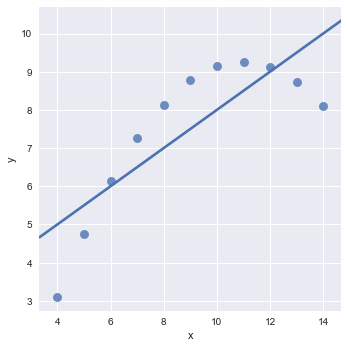

In [45]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset

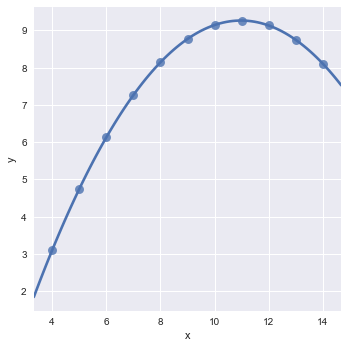

In [46]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

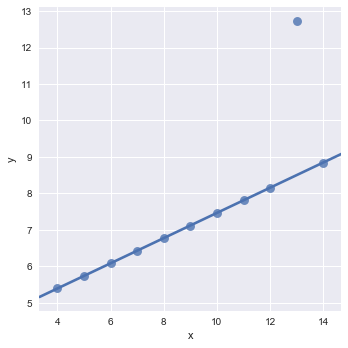

In [47]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

When the y variable is binary, simple linear regression also “works” but provides implausible predictions. The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

In [61]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False
5,25.29,4.71,Male,No,Sun,Dinner,4,True
6,8.77,2.00,Male,No,Sun,Dinner,2,True
7,26.88,3.12,Male,No,Sun,Dinner,4,False
8,15.04,1.96,Male,No,Sun,Dinner,2,False
9,14.78,3.23,Male,No,Sun,Dinner,2,True


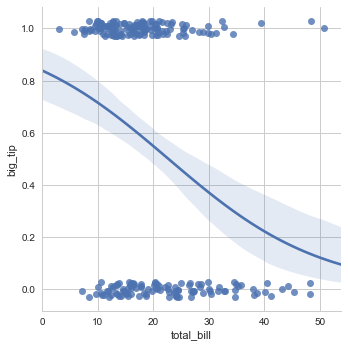

In [63]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)

The ``residplot()`` function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0.

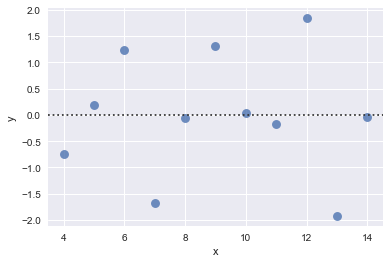

In [50]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})

The above dataset is suitable for linear regression.If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

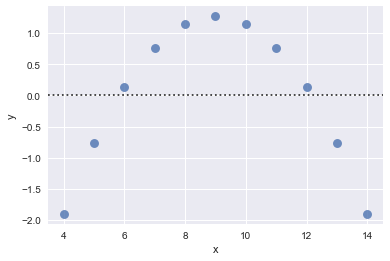

In [51]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80})

While ``regplot()`` always shows a single relationship, ``lmplot()`` combines ``regplot()`` with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

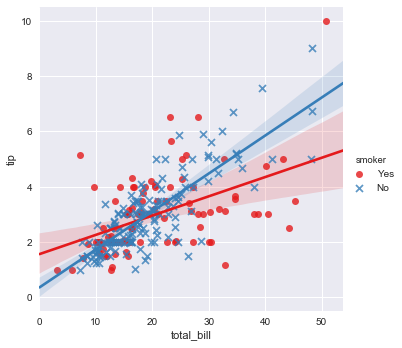

In [52]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

In [54]:
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")

## Categorical Scatter plots

A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses ``stripplot()``, which generalizes a scatterplot to the case where one of the variables is categorical:

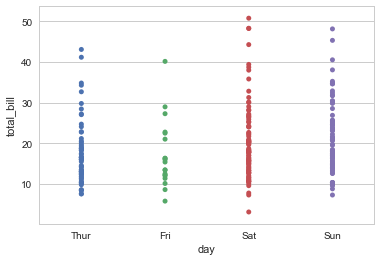

In [58]:
sns.stripplot(x="day", y="total_bill", data=tips)

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random “jitter”

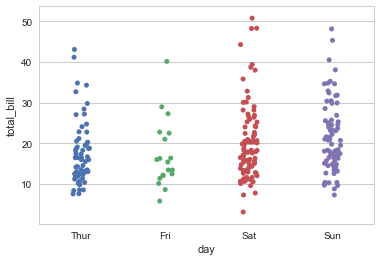

In [55]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

A different approach would be to use the function ``swarmplot()``, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

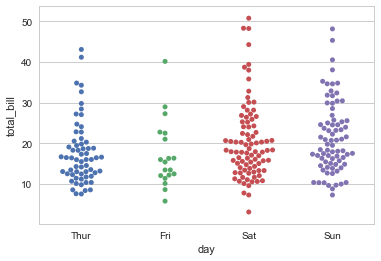

In [56]:
sns.swarmplot(x="day", y="total_bill", data=tips)

It’s also possible to add a nested categorical variable with the ``hue`` parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables:

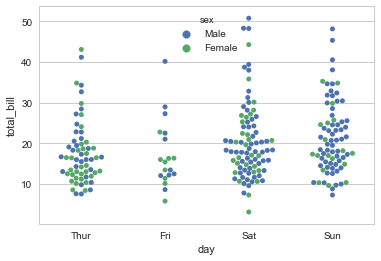

In [57]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

## Box plots, Violin Plots and Bar Charts

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels.

### 1. Box Plot
This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data

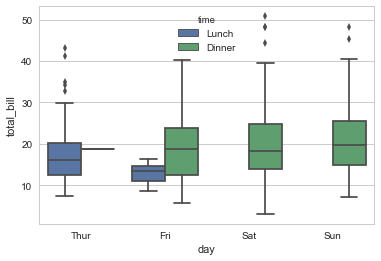

In [64]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

### 2. Violin Plot
A different approach is a ``violinplot()``, which combines a boxplot with the kernel density estimation procedure 

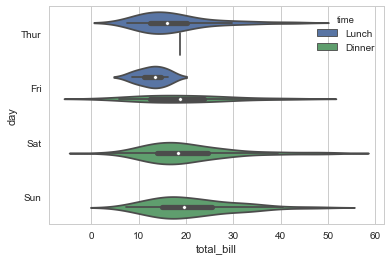

In [65]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)

It can also be useful to combine ``swarmplot()`` with ``violinplot()`` or ``boxplot()`` to show each observation along with a summary of the distribution:

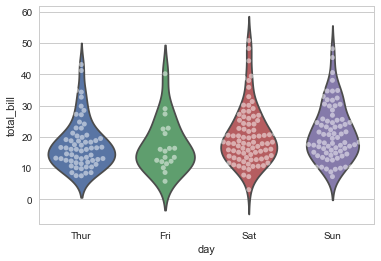

In [66]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)

### 3. Bar Chart

Often, rather than showing the distribution within each category, you might want to show the central tendency of the values.A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

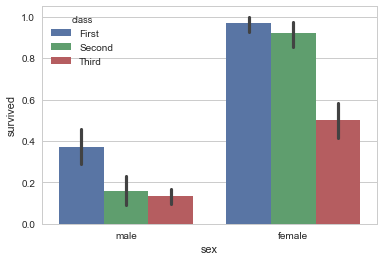

In [67]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

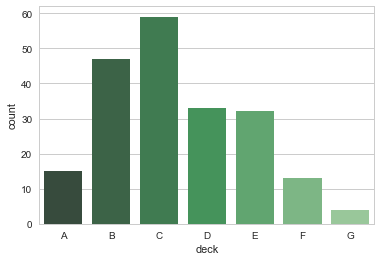

In [68]:
sns.countplot(x="deck", data=titanic, palette="Greens_d")

### To draw multi-panel categorical plots

The higher-level function ``factorplot()``, combines these functions with a ``FacetGrid()`` to add the ability to examine additional categories through the larger structure of the figure. By default, ``factorplot()`` produces a pointplot()

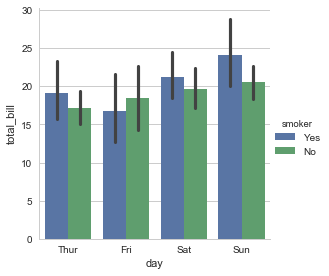

In [69]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar")

The main advantage of using a ``factorplot()`` is that it is very easy to “facet” the plot and investigate the role of other categorical variables:

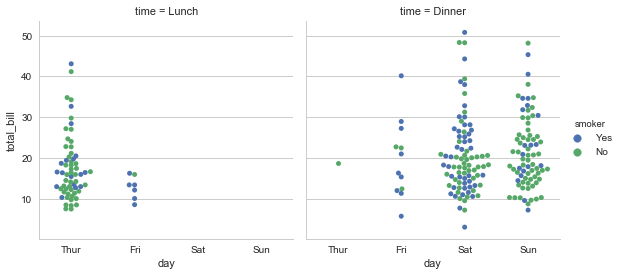

In [70]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm")

To change the size and shape of the figure we need to specify the ``size`` and ``aspect`` arguments

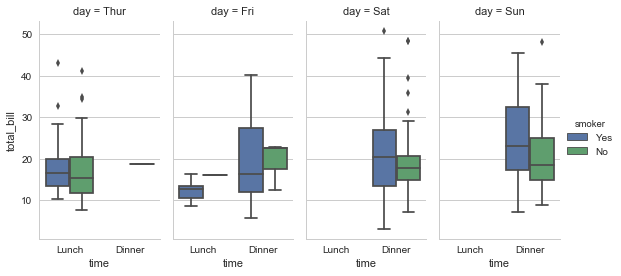

In [71]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5)

The ``FacetGrid`` class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: ``row``, ``col``, and ``hue``. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors. Here are two examples :

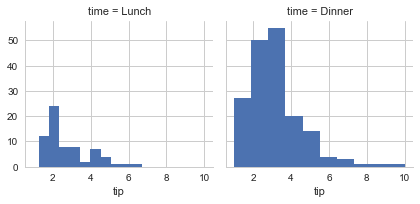

In [72]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip")

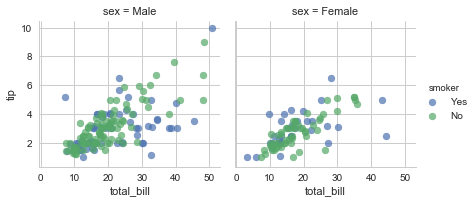

In [73]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()